#### Stock forecasting example

### Install yfinance package

In [8]:
!pip install statsmodels


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



  Using cached statsmodels-0.14.0-cp311-cp311-win_amd64.whl (9.2 MB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)


In [1]:
%pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/1c/19/bf19123baf16a55fd38cbb100b5a49380b9b6db7279987034689d11254c7/yfinance-0.2.32-py2.py3-none-any.whl.metadata
  Obtaining dependency information for requests>=2.31 from https://files.pythonhosted.org/packages/70/8e/0e2d847013cb52cd35b38c009bb167a1a26b2ce6cd6965bf26b47bc0bf44/requests-2.31.0-py3-none-any.whl.metadata
  Obtaining dependency information for lxml>=4.9.1 from https://files.pythonhosted.org/packages/31/58/e3b3dd6bb2ab7404f1f4992e2d0e6926ed40cef8ce1b3bbefd95877499e1/lxml-4.9.3-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/24/41/e53837badf8c85bf07ca1ea735cdd78df0f5bfe59e3affaaa174a55522c4/frozendict-2.3.9-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
      --------------------------------------- 0.0/2.9 MB 1.9 MB/s eta 0:00:02
      ----------


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


#### Read the Stock

In [2]:
import yfinance as yf
ticker = 'SBIN.NS'
df = yf.download(tickers=ticker,period='5y',interval='1mo')
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-01,286.700012,302.000000,268.350006,295.899994,283.184814,314605179
2019-01-01,297.500000,307.500000,276.549988,293.649994,281.031464,354323797
2019-02-01,296.899994,302.700012,258.799988,269.049988,257.488556,408697355
2019-03-01,270.549988,339.649994,270.100006,320.750000,306.966980,472623392
2019-04-01,321.799988,332.450012,303.600006,309.950012,296.631042,380333752


In [4]:
df.shape

(60, 6)

In [5]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#### Plot the Adj Close data

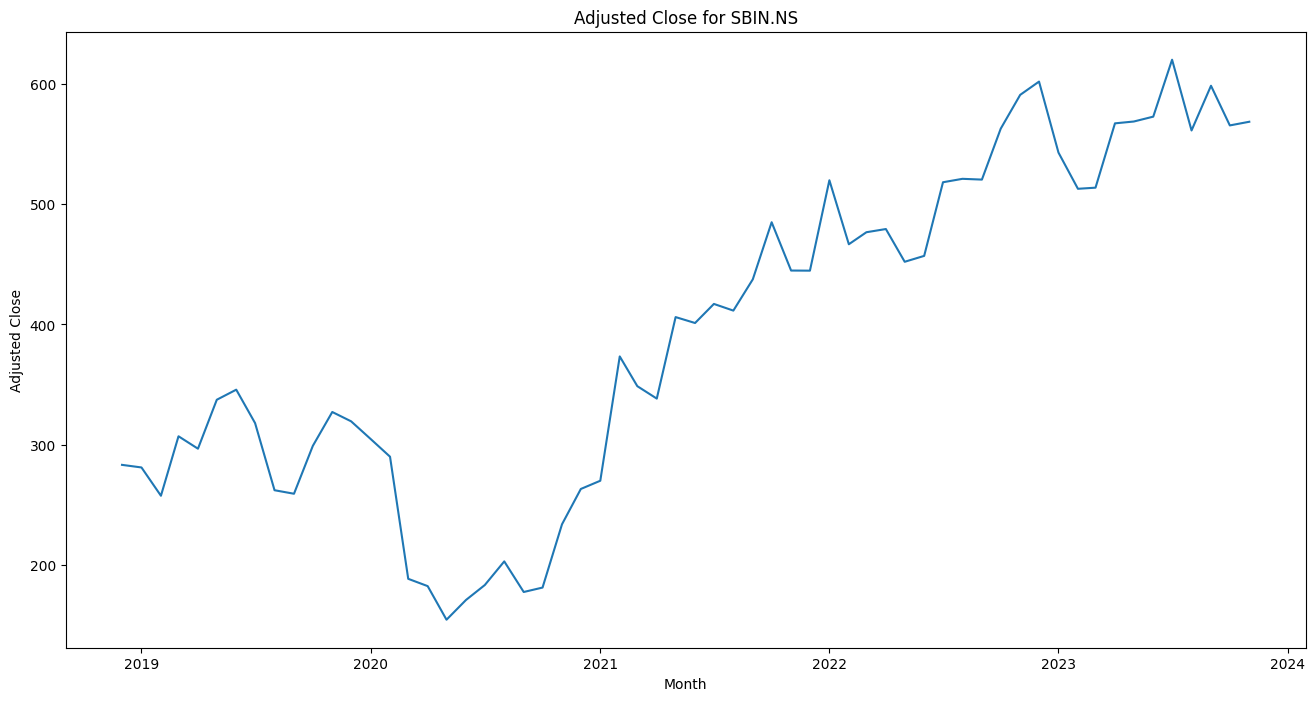

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'])
plt.xlabel('Month')
plt.ylabel('Adjusted Close')
plt.title(f'Adjusted Close for {ticker}')
plt.show()

#### Decomposition

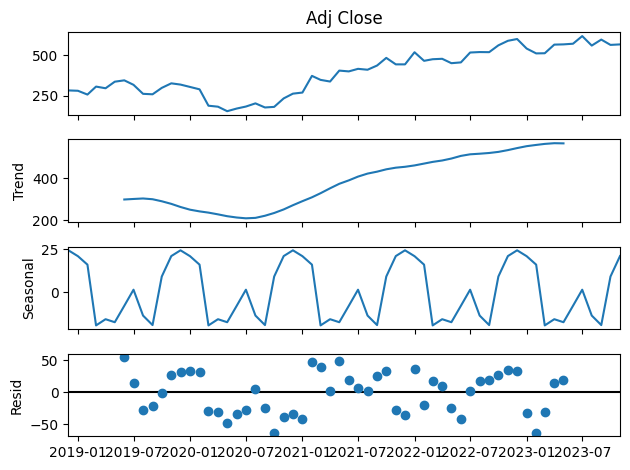

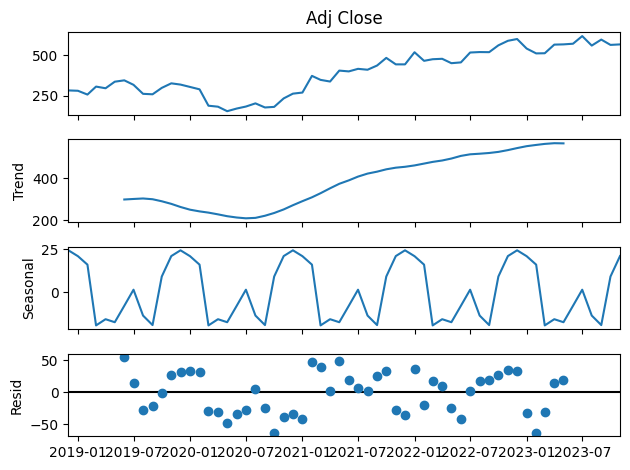

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
Q = seasonal_decompose(df['Adj Close'])
Q.plot()

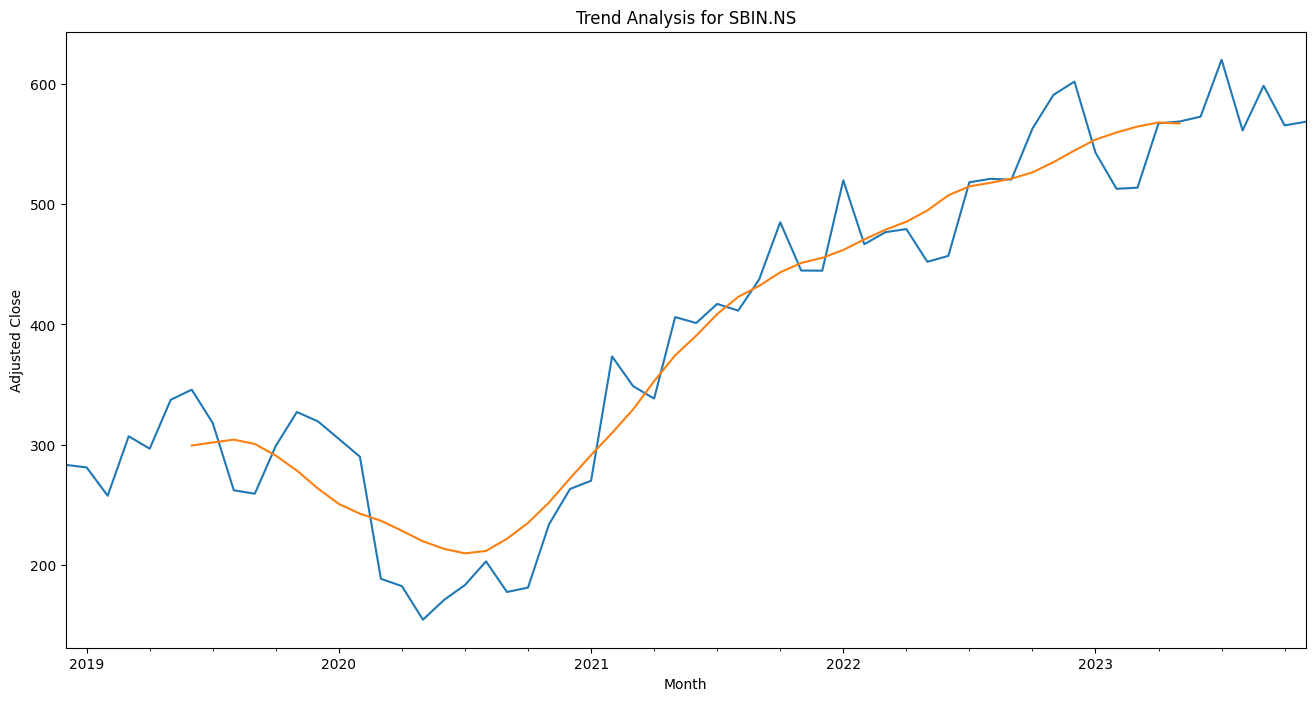

In [10]:
plt.figure(figsize=(16,8))
Q.observed.plot()
Q.trend.plot()
plt.xlabel('Month')
plt.ylabel('Adjusted Close')
plt.title(f'Trend Analysis for {ticker}')
plt.show()

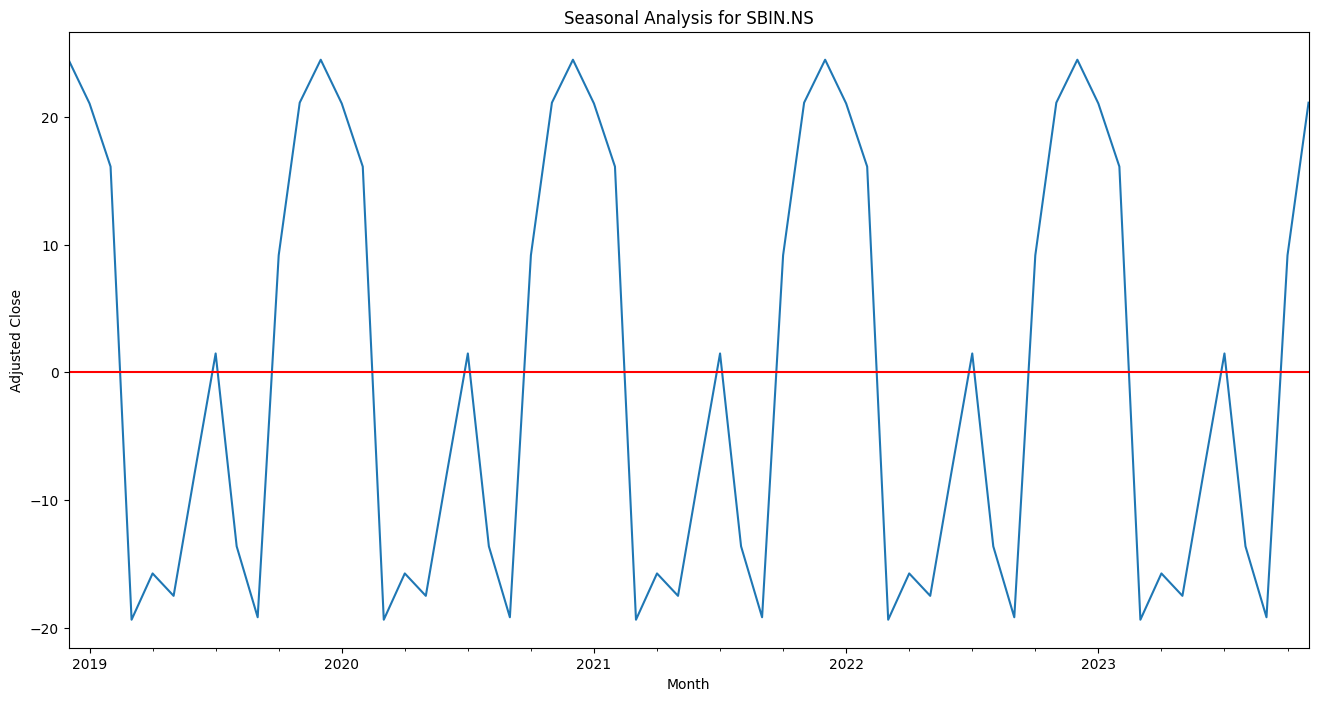

In [11]:
plt.figure(figsize=(16,8))
Q.seasonal.plot()
plt.axhline(color='red')
plt.xlabel('Month')
plt.ylabel('Adjusted Close')
plt.title(f'Seasonal Analysis for {ticker}')
plt.show()

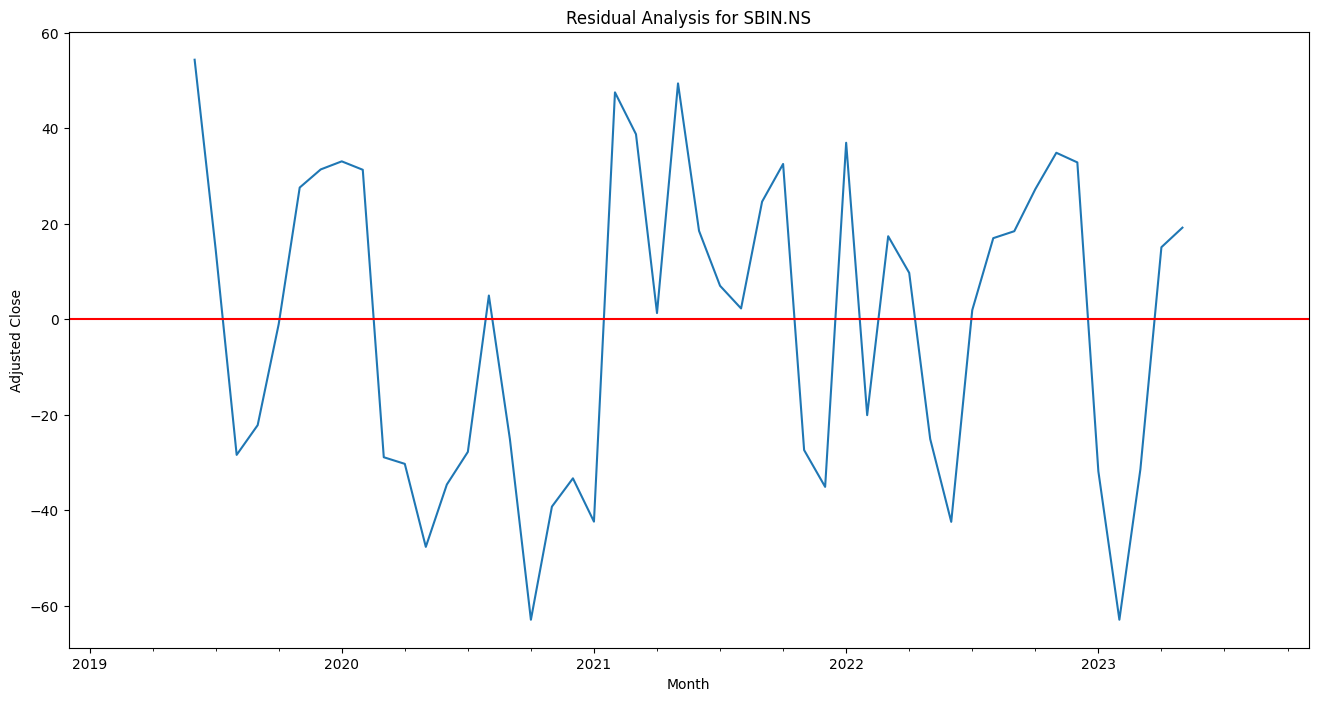

In [12]:
plt.figure(figsize=(16,8))
Q.resid.plot()
plt.axhline(color='red')
plt.xlabel('Month')
plt.ylabel('Adjusted Close')
plt.title(f'Residual Analysis for {ticker}')
plt.show()

#### Train Test Split

In [13]:
n = int(0.8*len(df))
ytrain, ytest = df['Adj Close'][0:n+1], df['Adj Close'][n:]

In [14]:
ytrain.shape

(49,)

In [16]:
ytest.shape

(12,)

#### Auto ARIMA

In [17]:
from pmdarima.arima import auto_arima

In [18]:
model = auto_arima(ytrain, m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=489.686, Time=1.06 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=484.444, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=484.527, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=484.520, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=484.044, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=482.610, Time=0.18 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=484.533, Time=0.33 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=484.536, Time=0.34 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=482.577, Time=0.16 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=484.534, Time=0.27 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=486.534, Time=0.34 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=484.531, Time=0.23 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=486.453, Time=0.42 sec
 ARIMA(0,1,0)(0,0,1)[12]             : AIC=483.195, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,1)

In [20]:
fp = len(df) - n - 1
fp

11

In [21]:
forecast, conf_level = model.predict(n_periods=fp, return_conf_int=True)

In [22]:
forecast

2023-01-01    587.714109
2023-02-01    604.268123
2023-03-01    615.542567
2023-04-01    625.349567
2023-05-01    637.108025
2023-06-01    644.856286
2023-07-01    633.441108
2023-08-01    642.340230
2023-09-01    650.160835
2023-10-01    641.249828
2023-11-01    643.930568
Freq: MS, dtype: float64

In [23]:
conf_level

array([[520.65513835, 654.77308002],
       [509.43241719, 699.10382927],
       [499.39302248, 731.69211168],
       [491.23162506, 759.46750842],
       [487.15960741, 787.056442  ],
       [480.59602506, 809.11654752],
       [456.01974796, 810.86246799],
       [452.66881788, 832.01164203],
       [448.98392213, 851.33774716],
       [429.19074267, 853.30891346],
       [421.52112273, 866.34001293]])

In [24]:
lower = conf_level[:, 0]
upper = conf_level[:, 1]

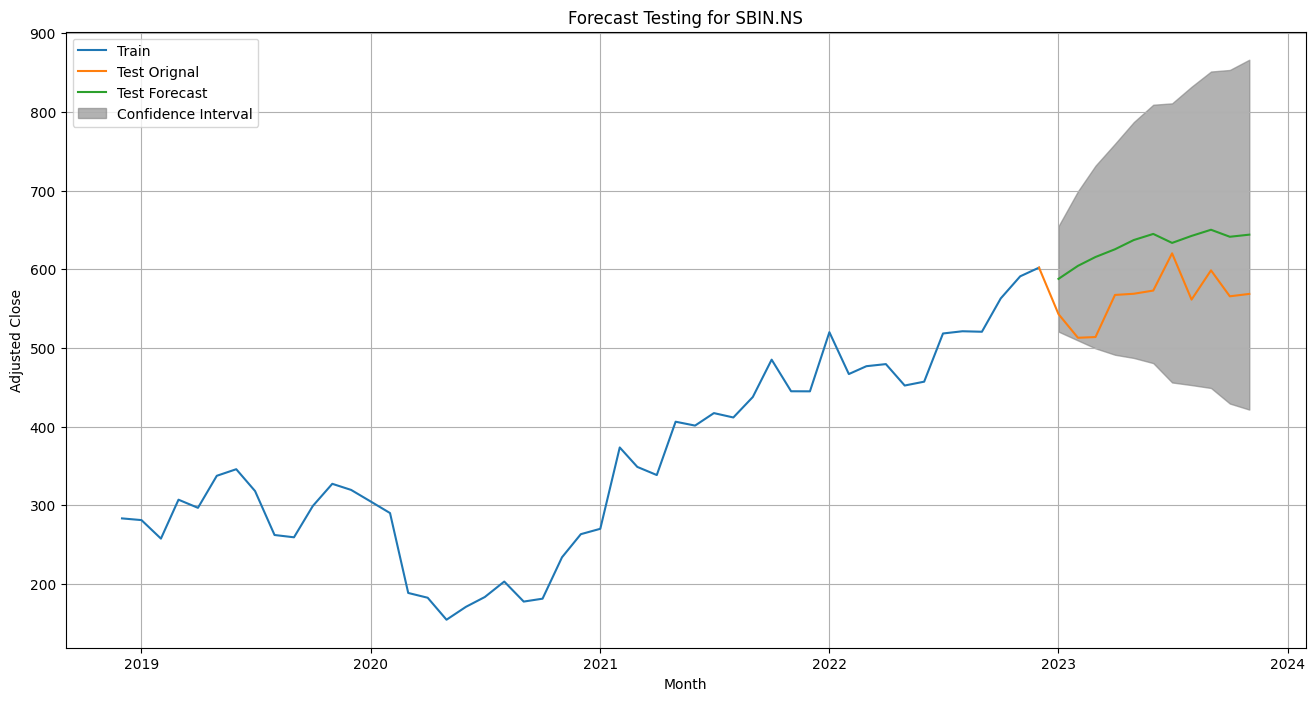

In [25]:
plt.figure(figsize=(16,8))
plt.plot(ytrain, label='Train')
plt.plot(ytest, label='Test Orignal')
plt.plot(forecast, label='Test Forecast')
plt.fill_between(forecast.index, lower, upper, color='gray', alpha=0.6, label='Confidence Interval')
plt.xlabel('Month')
plt.ylabel('Adjusted Close')
plt.title(f'Forecast Testing for {ticker}')
plt.legend(loc='upper left')
plt.grid()
plt.show()